In [1]:
import polars as pl
import xgboost as xgb

In [2]:
df = pl.read_csv("apple_quality.csv").with_columns(pl.col("Quality").replace({"bad":0, "good":1}).cast(pl.UInt8).alias("Quality"))
Xt = df[:-400,:-1]
yt = df[:-400,-1]
Xe = df[-400:,:-1]
ye = df[-400:,-1]
print(yt.to_numpy())

[1 1 0 ... 0 1 1]


In [3]:
model = xgb.XGBClassifier()
model.fit(Xt, yt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Axes: >

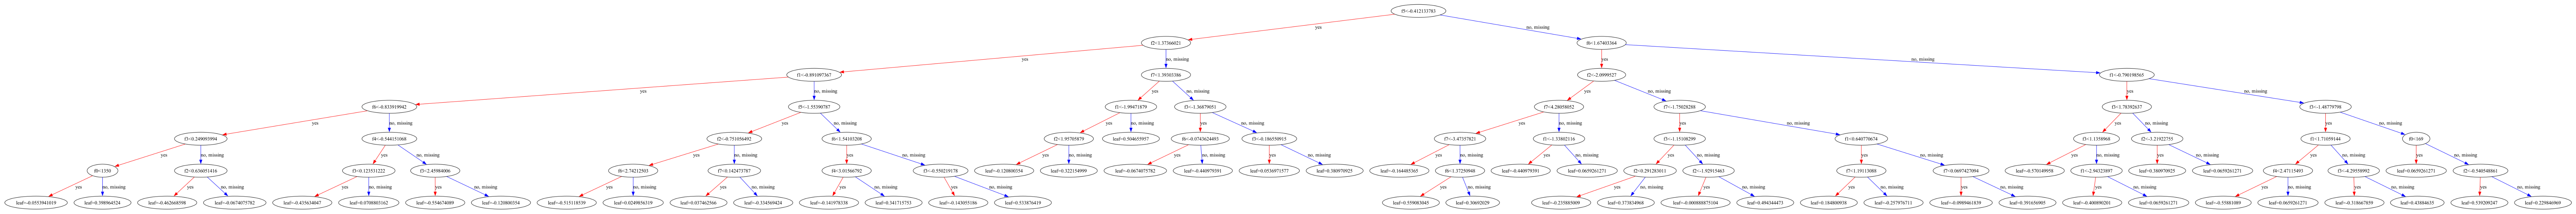

In [7]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,1, figsize=(100,10))
xgb.plot_tree(model,ax=ax)